In [2]:
import numpy as np 
import pandas as pd


In [3]:
df=pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1281,ham,Am I the only one who doesn't stalk profiles?,NaN,NaN,NaN
2924,ham,Are you coming to day for class.,NaN,NaN,NaN
4560,ham,Good afternoon my boytoy. How goes that walkin...,NaN,NaN,NaN
1265,ham,Im in inperialmusic listening2the weirdest tra...,NaN,NaN,NaN
905,ham,Hey what's up charles sorry about the late reply.,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [ ]:
# 1) data cleaning
#2) EDA
# 3) text preprocesing
# 4) modle building
# 5) evaluation
# 6) improvements
# 7) website
# 8) depl0y

DATA CLEANING


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
1707,ham,Was doing my test earlier. I appreciate you. W...
197,ham,is your hamster dead? Hey so tmr i meet you at...
800,spam,Last Chance! Claim ur Ã¥Â£150 worth of discoun...
5377,spam,The current leading bid is 151. To pause this ...
230,ham,Get down in gandhipuram and walk to cross cut ...


In [10]:
# renamming columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [11]:
df.sample(4)

,target,text
3449,ham,Ya just telling abt tht incident..
2163,ham,hi my darlin im on my way to London and we hav...
673,ham,Ditto. And you won't have to worry about me sa...
4038,ham,I cant pick the phone right now. Pls send a me...


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [13]:
df['target']=encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
## check missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
# check for duplicate values
df.duplicated().sum()

403

In [17]:
df=df.drop_duplicates(keep='first')

In [18]:
df.shape

(5169, 2)

Exploratory Data Analysis

In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

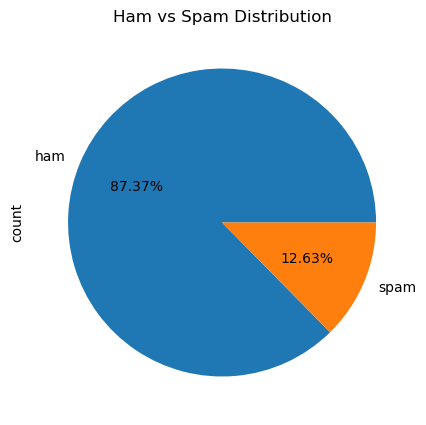

In [ ]:
import matplotlib.pyplot as plt

df['target'].value_counts().plot.pie(
    labels=['ham','spam'],
    autopct="%0.2f%%",   # show percentage with 2 decimals
    figsize=(5,5)        
)

plt.title("Ham vs Spam Distribution")
plt.show()


In [ ]:
# 88% of the messages are ham
# while almost 13% of the messages are spam

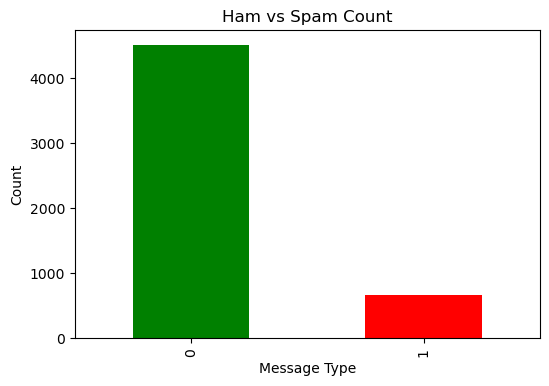

In [21]:
df['target'].value_counts().plot.bar(
    color=['green','red'],
    figsize=(6,4)
)
plt.title("Ham vs Spam Count")
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()


In [ ]:
# Insight: Shows imbalance (most datasets have way more ham than spam).

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df.columns

Index(['target', 'text'], dtype='object')

In [25]:
df['num_characters']=df['text'].apply(len)

In [27]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences'], dtype='object')

In [33]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,79.200813,18.456761,1.966531
std,58.387510,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.591231,17.123782,1.820195
std,56.406061,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,138.742726,27.675345,2.978560
std,30.419480,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,226.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

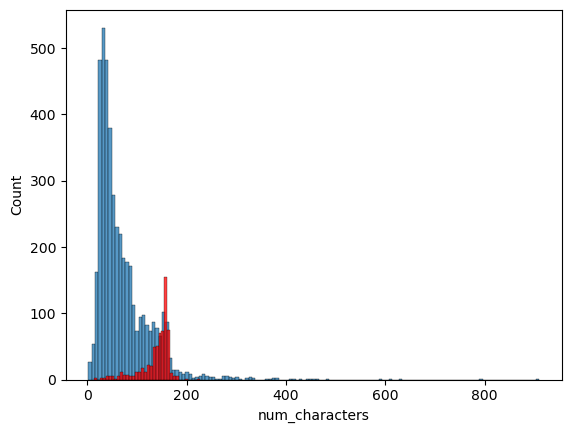

In [36]:
########spam messeges avg is larger than ham messeges
import seaborn as sns
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

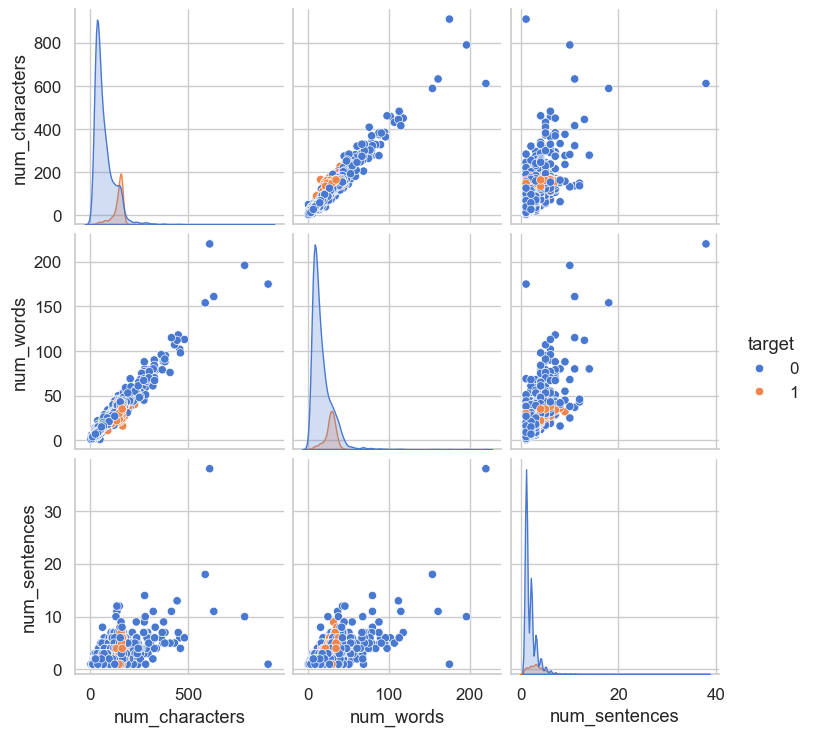

In [42]:
sns.pairplot(df,hue='target')





C:\Users\himan\AppData\Local\Temp\ipykernel_21976\521179622.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette=['#4CAF50','#F44336'], edgecolor="black")


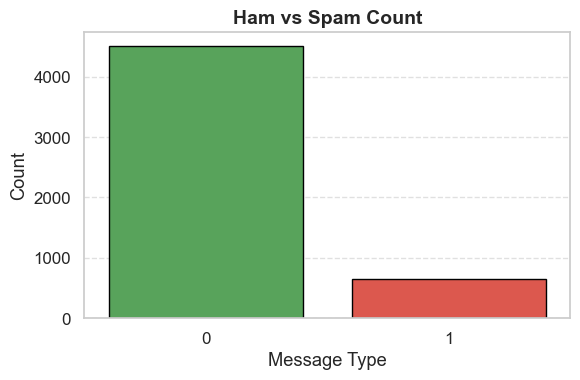

In [43]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='target', palette=['#4CAF50','#F44336'], edgecolor="black")
plt.title("Ham vs Spam Count", fontsize=14, weight='bold')
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
# Insight: Helps in understanding that length is a strong predictor.

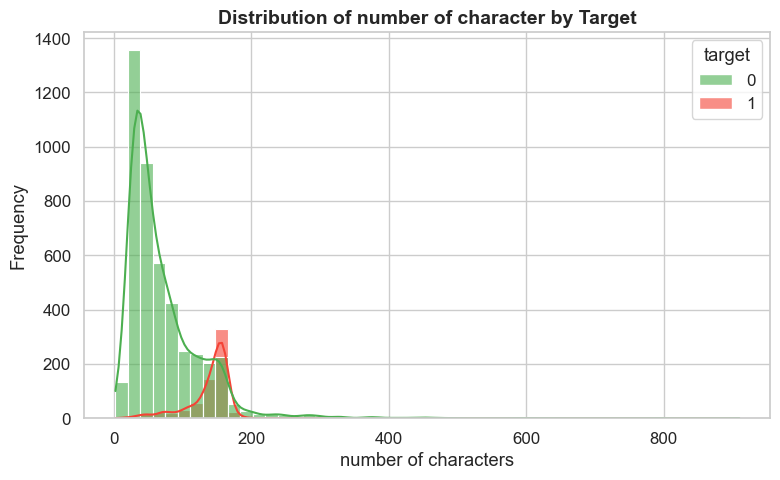

In [47]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='num_characters', hue='target',
             palette=['#4CAF50','#F44336'], bins=50, kde=True, alpha=0.6)
plt.title("Distribution of number of character by Target", fontsize=14, weight='bold')
plt.xlabel("number of characters")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [ ]:
#Insights: Spam usually has higher word counts.

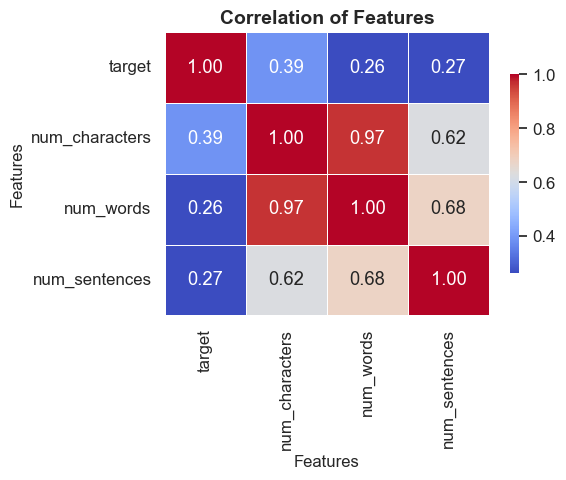

In [51]:

plt.figure(figsize=(6,5))
sns.heatmap(
    df[['target','num_characters','num_words','num_sentences']].corr(),
    annot=True,
    cmap="coolwarm",       # better color scheme
    fmt=".2f",             # 2 decimal places
    linewidths=0.5,        # adds gridlines
    cbar_kws={'shrink':0.7} # shrink colorbar
)

plt.title("Correlation of Features", fontsize=14, weight='bold')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
# From the correlation heatmap, i observe that message length features (num_characters, num_words, num_sentences) are strongly 
# correlated, which indicates they capture similar information. The target variable shows some positive correlation with num_characters 
# and num_words, suggesting that spam messages tend to have slightly higher/lower message length compared to ham. 


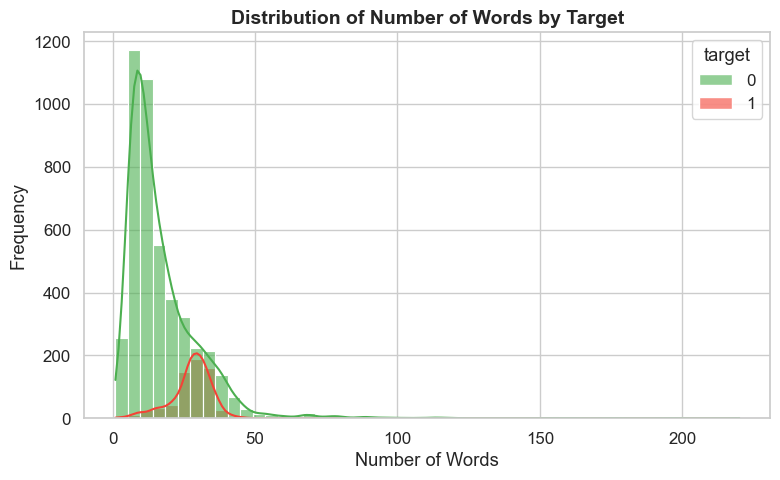

In [52]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='num_words', hue='target',
             palette=['#4CAF50','#F44336'], bins=50, kde=True, alpha=0.6)
plt.title("Distribution of Number of Words by Target", fontsize=14, weight='bold')
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [ ]:
# “This histogram shows that the number of words differs between ham and spam messages. Spam messages tend to have a broader distribution,
# while ham messages are more concentrated around shorter lengths. This indicates that message length is a useful feature but not sufficient
#  alone to classify spam accurately.”

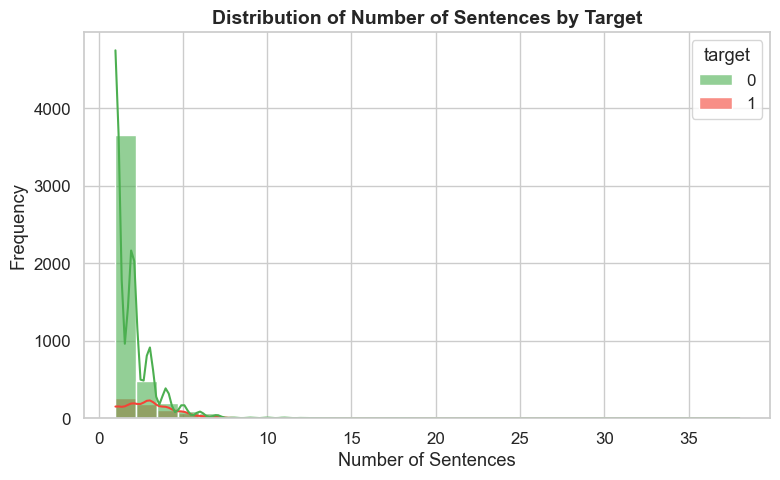

In [53]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='num_sentences', hue='target',
             palette=['#4CAF50','#F44336'], bins=30, kde=True, alpha=0.6)
plt.title("Distribution of Number of Sentences by Target", fontsize=14, weight='bold')
plt.xlabel("Number of Sentences")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [ ]:
# “This histogram reveals that most ham messages are concise, containing fewer sentences, whereas spam messages exhibit a broader 
# distribution in sentence count. While the number of sentences alone is not sufficient for perfect classification, it provides a 
# useful feature for our spam detection model.”

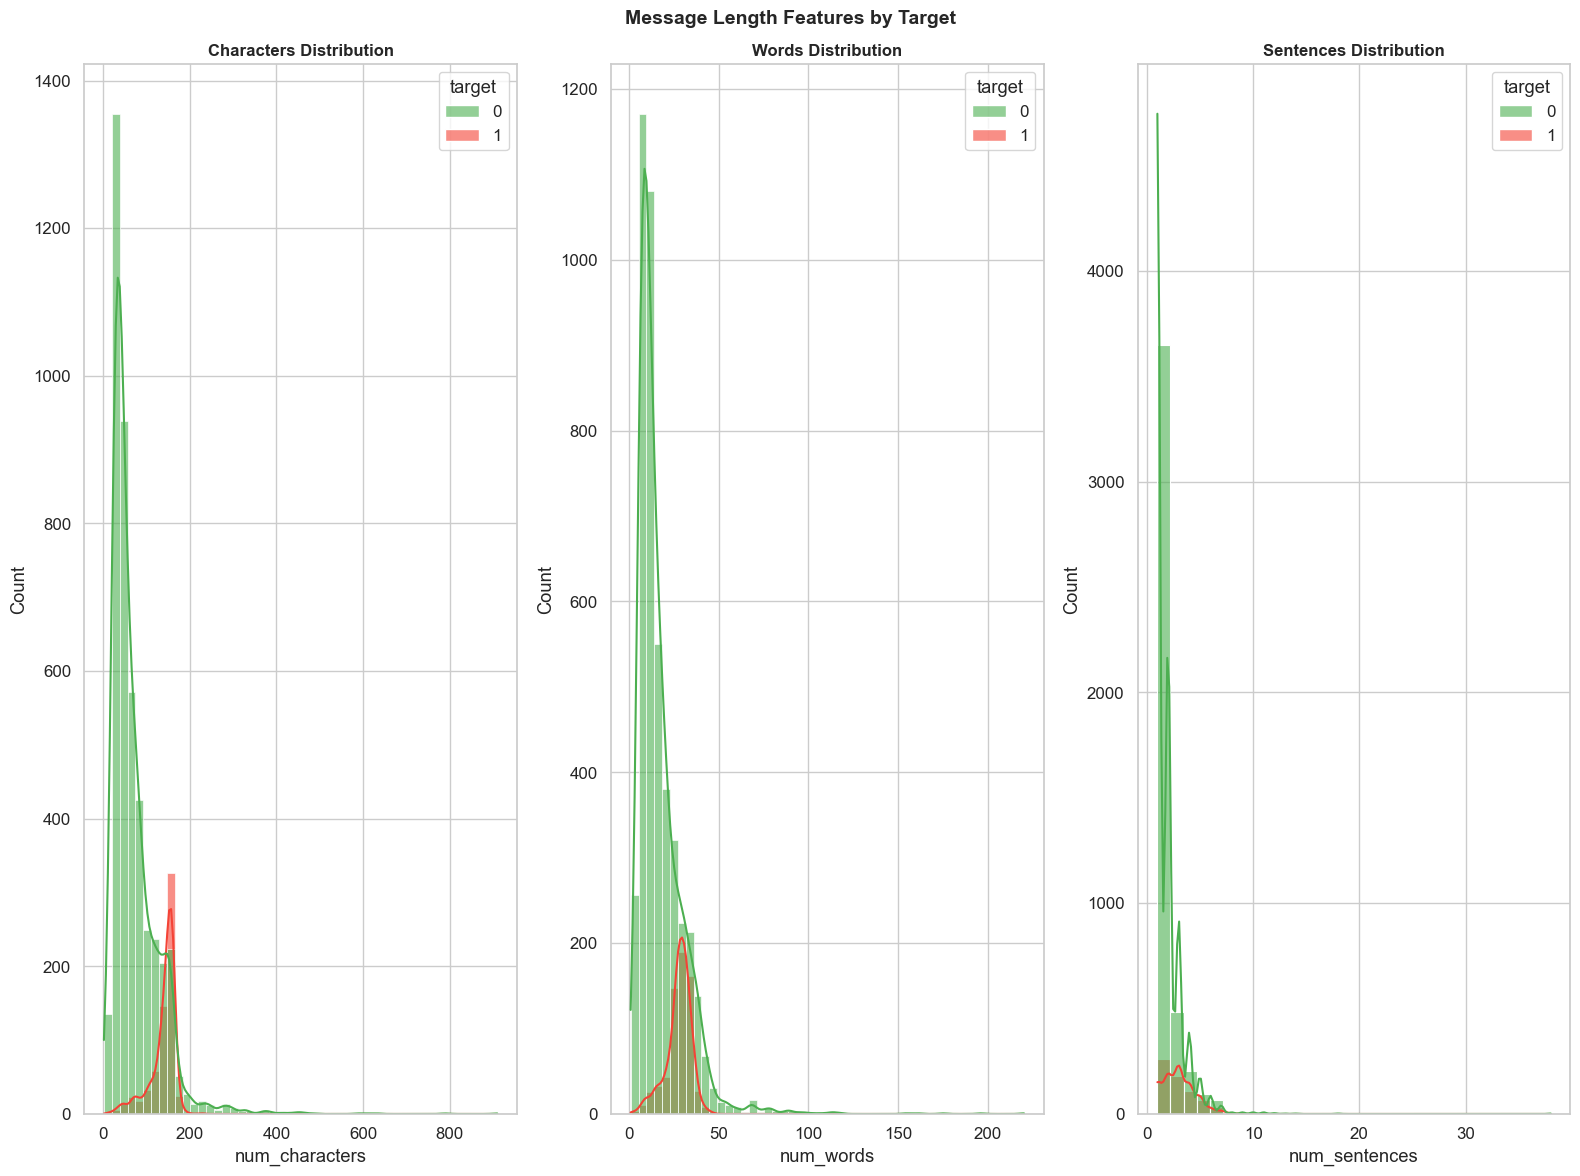

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(16,12))

sns.histplot(data=df, x='num_characters', hue='target',
             palette=['#4CAF50','#F44336'], bins=50, kde=True, alpha=0.6, ax=axes[0])
axes[0].set_title("Characters Distribution", fontsize=12, weight='bold')

sns.histplot(data=df, x='num_words', hue='target',
             palette=['#4CAF50','#F44336'], bins=50, kde=True, alpha=0.6, ax=axes[1])
axes[1].set_title("Words Distribution", fontsize=12, weight='bold')

sns.histplot(data=df, x='num_sentences', hue='target',
             palette=['#4CAF50','#F44336'], bins=30, kde=True, alpha=0.6, ax=axes[2])
axes[2].set_title("Sentences Distribution", fontsize=12, weight='bold')

plt.suptitle("Message Length Features by Target", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


C:\Users\himan\AppData\Local\Temp\ipykernel_21976\4057864891.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y='num_characters', palette=['#4CAF50','#F44336'], ax=axes[0])
C:\Users\himan\AppData\Local\Temp\ipykernel_21976\4057864891.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y='num_words', palette=['#4CAF50','#F44336'], ax=axes[1])
C:\Users\himan\AppData\Local\Temp\ipykernel_21976\4057864891.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y='num_sentences', palet

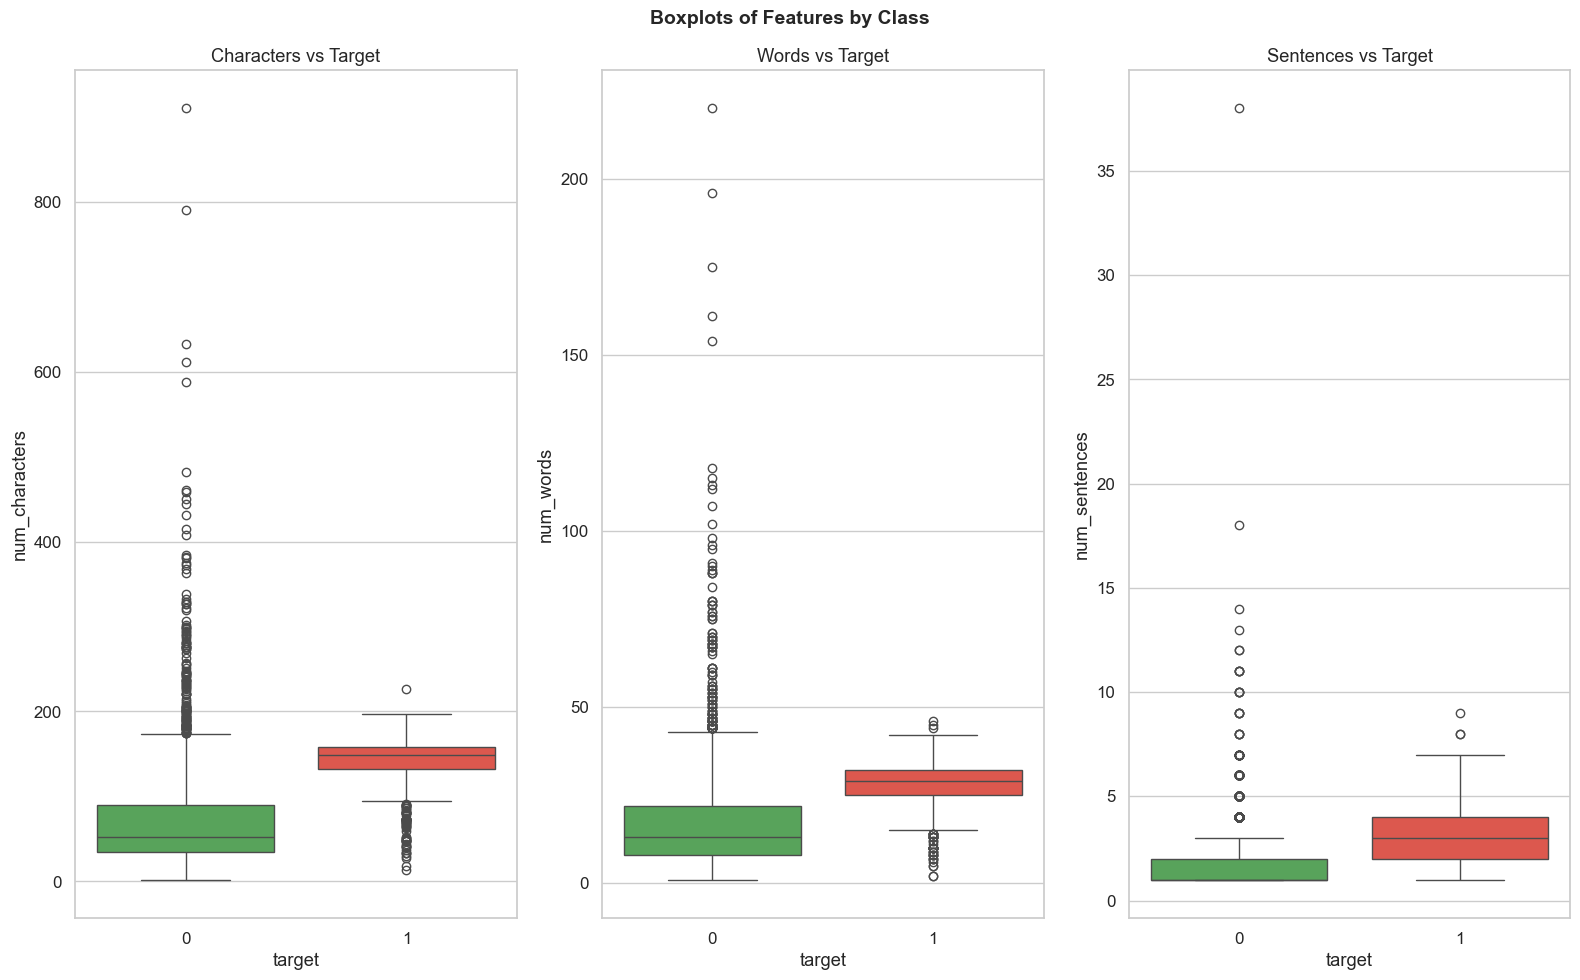

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(16,10))

sns.boxplot(data=df, x='target', y='num_characters', palette=['#4CAF50','#F44336'], ax=axes[0])
axes[0].set_title("Characters vs Target")

sns.boxplot(data=df, x='target', y='num_words', palette=['#4CAF50','#F44336'], ax=axes[1])
axes[1].set_title("Words vs Target")

sns.boxplot(data=df, x='target', y='num_sentences', palette=['#4CAF50','#F44336'], ax=axes[2])
axes[2].set_title("Sentences vs Target")

plt.suptitle("Boxplots of Features by Class", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


In [ ]:
# “The boxplots show that spam messages are generally longer than ham messages in terms of characters, words, and sentences. 
# Additionally, spam messages exhibit greater variability and more extreme values, which could be useful features for classification. 
# This visualization also helps identify potential outliers that may influence model performance.”


DATA PREPROCESSING
    lowercase
    tokenization
    removing special chaarachters
    removing step words and punctuation
    stemming


In [64]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
import string

In [ ]:
# stopwords.words('english)

In [66]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [ ]:
# transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
# df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [69]:
df['transformed_text']=df['text'].apply(transform_text)

In [70]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [71]:
from wordcloud import WordCloud

In [72]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [73]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

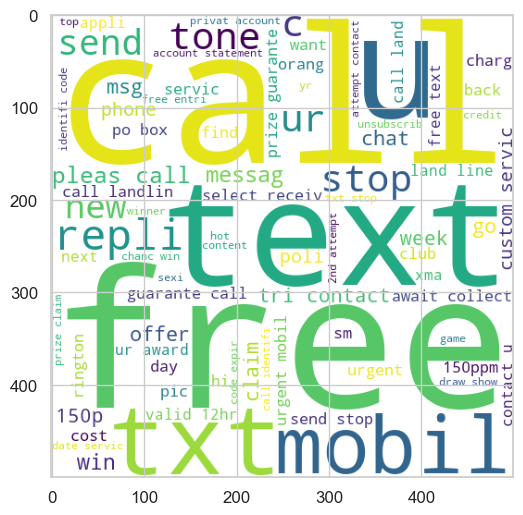

In [74]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [75]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

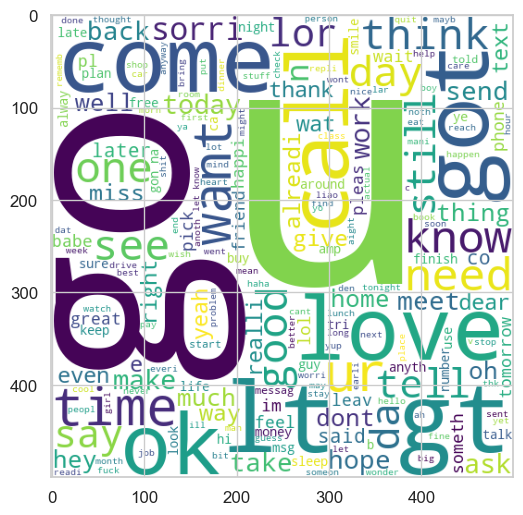

In [76]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [77]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [78]:
len(spam_corpus)

9936

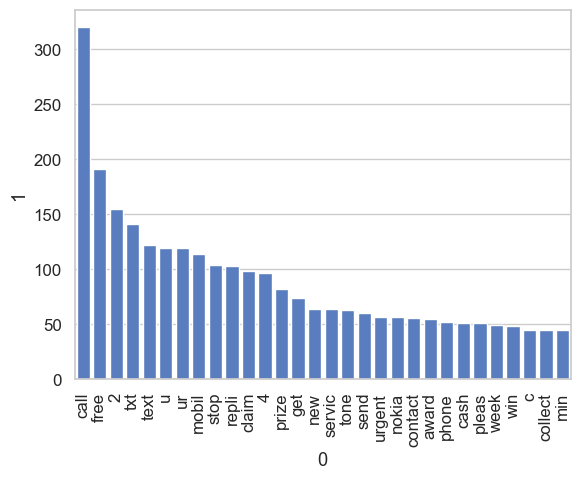

In [79]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [80]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [81]:
len(ham_corpus)

35305

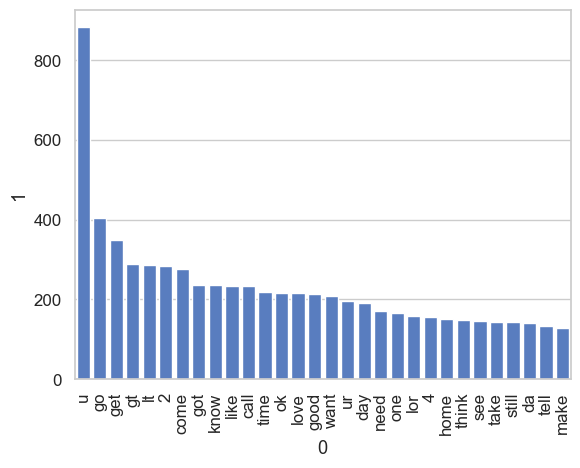

In [82]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [83]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
#####text vectorization
######using bag of words

MODEL BUILDING

In [84]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [85]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# X=scaler.fit_transform(X)

In [86]:
X.shape

(5169, 3000)

In [87]:
y=df['target'].values

In [88]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [89]:
from sklearn.model_selection import train_test_split


In [90]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [91]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [92]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [93]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
#very bad output obtained

0.8733075435203095
[[791 105]
 [ 26 112]]
0.5161290322580645


In [94]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
# still better

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [95]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
# good

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
# due to imbalance data we prefer accuracy 
# tfidf,mnb used

In [96]:
import pickle

In [97]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))